# [CptS 215 Data Analytics Systems and Algorithms](https://piazza.com/wsu/fall2017/cpts215/home)
[Washington State University](https://wsu.edu)

[Srini Badri](https://school.eecs.wsu.edu/people/faculty/), [Gina Sprint](http://eecs.wsu.edu/~gsprint/)

## MA5 Tree Practice (50 pts)
<mark>Due:</mark>

### Learner Objectives
At the conclusion of this micro assignment, participants should be able to:
* Implement/analyze trees
    * Binary trees
    * Binary search trees

### Prerequisites
Before starting this micro assignment, participants should be able to:
* Write object oriented Python code
* Write Markdown and code cells in Jupyter Notebook
* Perform algorithm analysis

### Acknowledgments
Content used in this assignment is based upon information in the following sources:
* [Data Structures: Abstraction and Design Using Java](http://www.wiley.com/WileyCDA/WileyTitle/productCd-EHEP001607.html) by Koffman and Wolfgang

## Overview and Requirements
For this micro assignment, you are going to download this Jupyter Notebook and answer the following questions. Your answer for a problem should be in a cell *immediately* after the problem cell. *Do not modify the problem cell.*

We are going to solve several problems related to trees and their efficiency. This micro assignment includes conceptional questions and programming.

### Conceptual Questions (35 pts)
Solve the following problems and *justify* your answers:

1. For the following binary tree:
<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/microassignments/figures/ma5_tree.png" width="400"/>

    1. (2 pts) Is the tree full?  
    1. (2 pts) Is the tree complete? 
    1. (2 pts) What is the tree's height? 
    1. List the nodes in the tree in the order they would be visited during a: 
        1. (4 pts) Pre-order traversal
        1. (4 pts) Level-order traversal
        1. (4 pts) Post-order traversal
        1. (4 pts) In-order traversal

A. The tree is full
B. The tree is complete 
C. The trees height is 4
D
Preorder: * A 1 X Y 2 B 3 4
Level order: * A B 1 2 3 4 X Y 
Post order: X Y 1 2  A 3 4 B *
In-order: X 1 Y A 2 * 3 B 4

2. (2 pts) What is the time complexity to search a full BST?

log(n)

3. The following questions refer to the same BST. The operations are cumulative:
    1. (2 pts) Show the BST that would result from inserting the items 35, 20, 30, 50, 45, 60, 18, 25 in this sequence.
    1. (2 pts) Show the BST that would result after removing item 35 (promote in order successor).
    1. (2 pts) Show the BST that would result after removing item 18 (promote in order successor).
    1. (2 pts) How would the trees in the previous problems look differently if we promote in order predecessors instead of successors?

A.
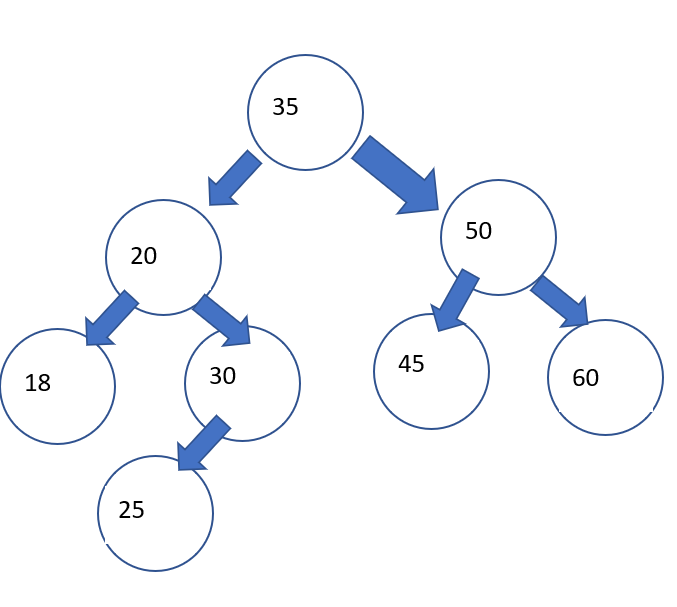


B.
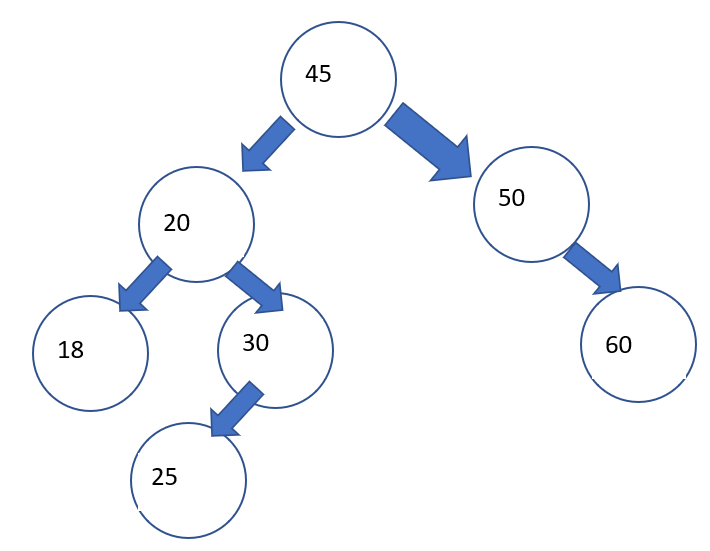

C.
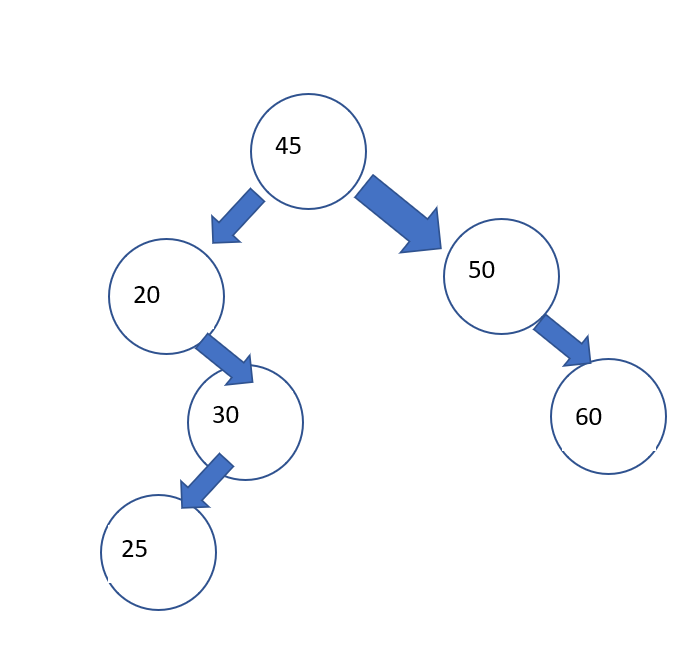

D.
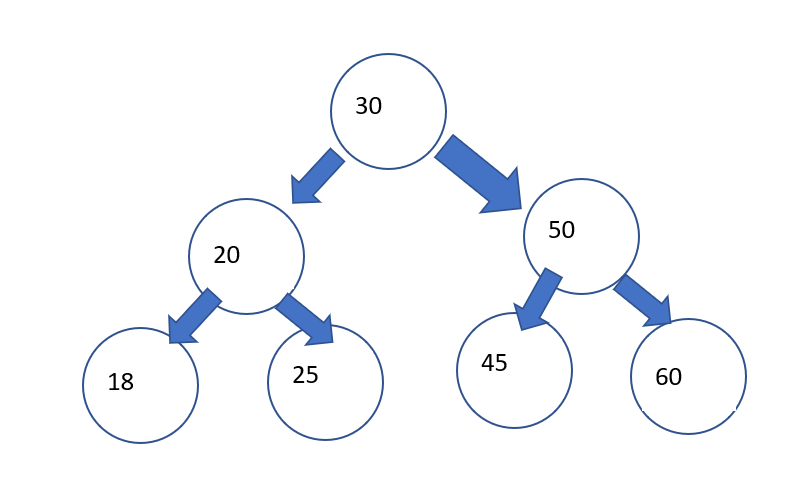

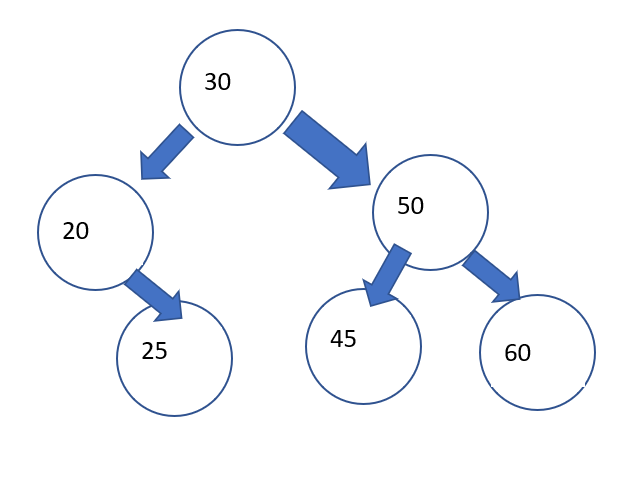

4. (3 pts) Give the function calls of `BinaryTree` class methods (from lecture notes) to build the following tree:

<img src="https://runestone.academy/runestone/books/published/pythonds/_images/exerTree.png" width="540"/>

(image from [https://runestone.academy/runestone/books/published/pythonds/_images/exerTree.png])

tree = BinaryTree("language")
tree.insert_left("compiled")
tree.insert_right("interpreted")
tree.left_child.insert_left("C")
tree.left_child.insert_right("Java")
tree.right_child.insert_right("Scheme")
tree.right_child.insert_left("Python")

### Implementation Question (12 pts)

Implement a Binary Search Tree data structure using the code provided in the lecture. Update the implementation as described below:
* (12 pts) Add `post_order_traversal()` and `in_order_traversal()` methods to print the `data`in post-order and in-order respectively.

Test your implementation using the following sequence of code:

In [16]:
# Test code for post-order and in-order traversal methods

class BSTNode:
    '''
    
    '''
    def __init__(self, data, left_child=None, right_child=None, parent=None):
        '''
        
        '''
        self.data = data
        self.left_child = left_child
        self.right_child = right_child
        self.parent = parent
        
    def __iter__(self):
        '''
        Yield freezes the state of the function so that the next time the function 
        is called it continues executing from the exact point it left off earlier.
        '''
        if self:
            if self.has_left_child():
                 for elem in self.left_child:
                    yield elem
            yield self.data
            if self.has_right_child():
                 for elem in self.right_child:
                    yield elem

    def has_left_child(self):
        '''
        
        '''
        return self.left_child

    def has_right_child(self):
        '''
        
        '''
        return self.right_child

    def is_left_child(self):
        '''
        
        '''
        return self.parent and self.parent.left_child == self

    def is_right_child(self):
        '''
        
        '''
        return self.parent and self.parent.right_child == self

    def is_root(self):
        '''
        
        '''
        return not self.parent

    def is_leaf(self):
        '''
        
        '''
        return not (self.right_child or self.left_child)

            
class BinarySearchTree:
    '''
    
    '''
    def __init__(self):
        '''
        
        '''
        self.root = None
        self.size = 0

    def length(self):
        '''
        
        '''
        return self.size

    def __len__(self):
        '''
        Return the number of nodes stored in the map.
        '''
        return self.size

    def __iter__(self):
        '''
        
        '''
        return self.root.__iter__()
    
    def __contains__(self, data):
        '''
        Return True for a statement of the form data in tree, if the given data is in the tree.
        '''
        if self._get(data, self.root):
            return True
        else:
            return False
    
    def put(self, data):
        '''
        Add a new data to the tree. 
        If the data is already in the tree then do nothing.
        
        If there is not a root then put will create a new BSTNode and install it as the root of the tree. 
        If a root node is already in place then put calls the private, recursive, helper function _put to search the tree
        '''
        if self.root:
            self._put(data, self.root)
        else:
            self.root = BSTNode(data)
            self.size = self.size + 1

    def _put(self, data, current_node):
        '''
        Starting at the root of the tree, search the binary tree comparing the new data 
        to the data in the current node. If the new data is less than the current node, 
        search the left subtree. If the new data is greater than the current node, 
        search the right subtree.

        When there is no left (or right) child to search, we have found the position 
        in the tree where the new node should be installed.

        To add a node to the tree, create a new BStNode object and insert the object 
        at the point discovered in the previous step.
        '''
        if data == current_node.data: # handle duplicates
            return
        elif data < current_node.data:
            if current_node.has_left_child():
                self._put(data, current_node.left_child)
            else:
                current_node.left_child = BSTNode(data, parent=current_node)
                self.size = self.size + 1                
        else:
            if current_node.has_right_child():
                self._put(data, current_node.right_child)
            else:
                current_node.right_child = BSTNode(data, parent=current_node)
                self.size = self.size + 1                
                    
    def get(self, data):
        '''
        Given a data, return the data stored in the map or None otherwise.
        '''
        if self.root:
            res = self._get(data, self.root)
            if res:
                   return res.data
            else:
                   return None
        else:
            return None

    def _get(self, data, current_node):
        '''
        searches the tree recursively until it gets to a non-matching leaf node or finds a matching data. 
        When a matching data is found, the data itself is returned.
        '''
        if not current_node:
            return None
        elif current_node.data == data:
            return current_node
        elif data < current_node.data:
            return self._get(data, current_node.left_child)
        else:
            return self._get(data, current_node.right_child)

    def delete(self, data):
        '''
        Find the node to delete by searching the tree using the 
        _get method to find the BSTNode that needs to be removed. 
        
        If the tree only has a single node, that means we are removing the root of the tree, 
        but we still must check to make sure the data of the root matches the data that is to be deleted.
        '''
        if self.size == 1 and self.root.data == data:
            self.root = None
            self.size = self.size - 1
        elif self.size > 1:
            node_to_remove = self._get(data, self.root)
            if node is not None:
                self.remove(node_to_remove)
                self.size = self.size - 1
            else:
                raise KeyError("Error, data not present in the tree")
        else:
            raise KeyError("Error, data not present in the tree")

    def remove(self, curr_node):
        '''
        3 cases to consider:
        1. The node to be deleted has no children
        --->Delete the node and remove the reference to this node in the parent.
        2. The node to be deleted has only one child
        -->Promote the child to take the place of its parent.
        -->If the current node has no parent, it must be the root. Replace the root node.
        3. The node to be deleted has two children
        -->Search the tree for a node (successor) that can be used to replace the one scheduled for deletion
        -->Remove the successor and put it in the tree in place of the node to be deleted.
        '''
        if (curr_node.left_child is None and curr_node.right_child is None):  #leaf (case 1)
            if curr_node.parent.left_child is curr_node:
                curr_node.parent.left_child = None
            else:
                curr_node.parent.right_child = None
        elif (curr_node.left_child is not None and curr_node.right_child is None): #node has one child (case 2)
            if curr_node.parent is not None:
                if curr_node.parent.left_child is curr_node:
                    curr_node.parent.left_child = curr_node.left_child
                else:
                    curr_node.parent.right_child = curr_node.left_child
                curr_node.left_child.parent = curr_node.parent
            else:
                self.root = curr_node.left_child
                curr_node.left_child.parent = None
        elif (curr_node.left_child is None and curr_node.right_child is not None): #node has one child (case 2)
            if curr_node.parent is not None:
                if curr_node.parent.left_child is curr_node:
                    curr_node.parent.left_child = curr_node.right_child
                else:
                    curr_node.parent.right_child = curr_node.right_child
            else:
                self.root = curr_node.right_child
                curr_node.right_child.parent = None
        else:                                       #node has two children (case 3)
            succ_node = self.find_min(curr_node.right_child)
            self.remove(succ_node)

            succ_node.parent = curr_node.parent
            if curr_node.parent is not None:
                if curr_node.parent.left_child is curr_node:
                    curr_node.parent.left_child = succ_node
                else:
                    curr_node.parent.right_child = succ_node
            else:
                self.root = succ_node

            succ_node.left_child = curr_node.left_child
            if curr_node.left_child is not None:
                curr_node.left_child.parent = succ_node

            succ_node.right_child = curr_node.right_child
            if curr_node.right_child is not None:
                curr_node.right_child.parent = succ_node
                
    def find_min(self, curr_node):
        '''
        Find the successor node - node with minimum data value in the right subtree
        '''        
        if curr_node.left_child is None:
            return curr_node
        else:
            return self.find_min(curr_node.left_child)
        
    def pre_order_traversal(self):
        '''
        Pre-order traversal method
        '''          
        if self.root is None:
            print("Empty Tree")
        else:
            self.pre_order_traversal_helper(self.root)
            print()

    def pre_order_traversal_helper(self, node):
        '''
        Helper method for pre-order traversal
        '''          
        if node is None:
            return
        print(node.data, end=" ")
        self.pre_order_traversal_helper(node.left_child)
        self.pre_order_traversal_helper(node.right_child)
        
    def post_order_traversal(self):
         if self.root is None:
            print("Empty Tree")
         else:
            self.post_order_traversal_helper(self.root)
            print()
    
    def post_order_traversal_helper(self,node):
        if node is None:
            return
       
        self.post_order_traversal_helper(node.left_child)
        self.post_order_traversal_helper(node.right_child)
        print(node.data, end=" ")
        
    def in_order_traversal(self):
         if self.root is None:
            print("Empty Tree")
         else:
            self.in_order_traversal_helper(self.root)
            print()
    
    def in_order_traversal_helper(self,node):
        if node is None:
            return
       
        self.in_order_traversal_helper(node.left_child)
        print(node.data, end=" ")
        self.in_order_traversal_helper(node.right_child)
       
        

mytree = BinarySearchTree()





mytree.put(122)
mytree.put(131)
mytree.put(115)
mytree.put(215)
mytree.put(121)
mytree.put(132)



mytree.post_order_traversal()
mytree.in_order_traversal()

121 115 132 215 131 122 
115 121 122 131 132 215 


Here is the expected print output for post_order_travesal() method (use of comma is optiona):

<i>121, 115, 132, 215, 131, 122</i>


Here is the expected print output for in_order_traversal() method (use of comma is optional):

<i>115, 121, 122, 131, 132, 215</i>

## Submitting Assignments
1.	Use Canvas to submit your assignment. You must upload your solutions as `<your last name>_ma5.zip` by the due date and time.
2.	Your .zip file should contain your .ipynb file and a .html file representing your Notebook as a webpage (File->Download as->HTML).

## Grading Guidelines
This assignment is worth 50 points. Your assignment will be evaluated based on a successful compilation and adherence to the program requirements. We will grade according to the following criteria:
* 35 pts for correct answers to the conception questions
* 12 pts for correct implementation of Binary Search Tree `post_order_traversal()` and `in_order_traversal()` methods
* 3 pts for for adherence to proper programming style and comments established for the class